✅ 🎯 Goal:
Train multiple neural networks (ensemble) on the Aircraft Pitch Prediction dataset to:

Predict the target (pitch).

Measure the uncertainty by looking at the variance across model predictions.

⚙️ Requirements
You'll need:

train.csv from the Aircraft Pitch Challenge.

TensorFlow and standard Python ML libraries.

#Install & Import Libraries

In [ ]:
!pip install -q tensorflow scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load into DataFrame
df = pd.read_csv("train.csv")
print(df.head())

# Check column names
print(df.columns)


   CbRt  SGZ     P     Q  CrRl  AbRl  DfClb  DfRlRt  DfDfClb     ST1     ST2  \
0  -437   10 -0.34  0.15  -0.4   -20      4  -0.017     -0.4 -0.0013 -0.0016   
1  -282  -34 -0.40  0.00   0.3   -10     -5  -0.020      1.6 -0.0010 -0.0010   
2   -90  -20 -0.21 -0.02   0.2    -8      3  -0.004     -0.2 -0.0005 -0.0006   
3  -164    0  0.19  0.08   2.0   -11    -12  -0.009      0.5 -0.0009 -0.0008   
4     8  -36  0.41  0.09   1.8   -19      9  -0.022     -0.1 -0.0021 -0.0022   

      ST3     ST4   DfST1  DfST2   DfST3  DfST4      Sa  Target  
0 -0.0016 -0.0016  0.0003      0  0.0000      0 -0.0016   0.022  
1 -0.0010 -0.0010  0.0000      0  0.0000      0 -0.0010   0.016  
2 -0.0006 -0.0006  0.0000      0  0.0000      0 -0.0006   0.019  
3 -0.0008 -0.0008 -0.0002      0 -0.0001      0 -0.0008   0.017  
4 -0.0022 -0.0024  0.0001      0  0.0001      0 -0.0024   0.036  
Index(['CbRt', 'SGZ', 'P', 'Q', 'CrRl', 'AbRl', 'DfClb', 'DfRlRt', 'DfDfClb',
       'ST1', 'ST2', 'ST3', 'ST4', 'DfST1', '

#Preprocess Data

In [ ]:
# Split features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


#Define Model Function

In [ ]:
def build_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


#Train Deep Ensemble Models

In [ ]:
n_ensemble = 5
ensemble_models = []

for i in range(n_ensemble):
    print(f"Training model {i+1}")
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
    ensemble_models.append(model)


Training model 1
Training model 2
Training model 3
Training model 4
Training model 5


#Predict & Estimate Uncertainty

In [ ]:
# Get predictions from each model
ensemble_preds = np.array([model.predict(X_val_scaled).flatten() for model in ensemble_models])

# Mean prediction
mean_preds = ensemble_preds.mean(axis=0)

# Uncertainty (standard deviation across model outputs)
std_preds = ensemble_preds.std(axis=0)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


#Evaluate Models

In [ ]:
mse = mean_squared_error(y_val, mean_preds)
mae = mean_absolute_error(y_val, mean_preds)
r2 = r2_score(y_val, mean_preds)

print("🔍 Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


🔍 Evaluation Metrics:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R² Score: 0.39


#Display Sample Results

In [ ]:
for i in range(10):
    print(f"Sample {i+1}")
    print(f"  True Target       : {y_val.iloc[i]:.2f}")
    print(f"  Predicted Target  : {mean_preds[i]:.2f}")
    print(f"  Uncertainty (±2σ) : ±{2 * std_preds[i]:.2f}")


Sample 1
  True Target       : 0.03
  Predicted Target  : 0.04
  Uncertainty (±2σ) : ±0.03
Sample 2
  True Target       : 0.02
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.01
Sample 3
  True Target       : 0.03
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.01
Sample 4
  True Target       : 0.02
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.02
Sample 5
  True Target       : 0.02
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.03
Sample 6
  True Target       : 0.03
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.01
Sample 7
  True Target       : 0.02
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.00
Sample 8
  True Target       : 0.02
  Predicted Target  : 0.03
  Uncertainty (±2σ) : ±0.01
Sample 9
  True Target       : 0.02
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.02
Sample 10
  True Target       : 0.02
  Predicted Target  : 0.02
  Uncertainty (±2σ) : ±0.01


#Visualization of Predictions with Uncertainty

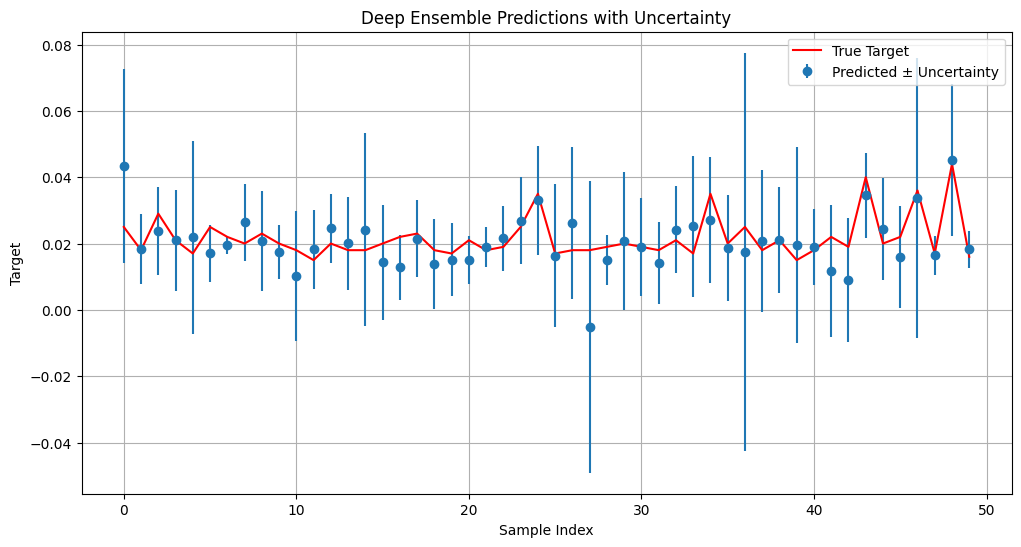

In [ ]:
plt.figure(figsize=(12,6))
plt.errorbar(range(50), mean_preds[:50], yerr=2*std_preds[:50], fmt='o', label='Predicted ± Uncertainty')
plt.plot(range(50), y_val.values[:50], 'r-', label='True Target')
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.title("Deep Ensemble Predictions with Uncertainty")
plt.legend()
plt.grid(True)
plt.show()
